,price,bedrooms
5634,100000.0,4
15796,133000.0,5
13506,135000.0,4
16353,139000.0,4
14211,142500.0,4


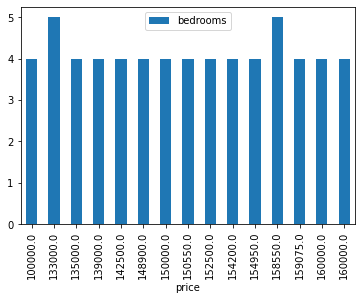

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
df = pd.read_csv("data/King_County_House_prices_dataset.csv")

df = df[["price", "bedrooms"]]

#df_bedrooms = df.query("bedrooms == 4") # filter database for only 4 bedrooms
#df_bedrooms.price.median() # medien price for 4 bedrooms
df_bedrooms_price = df.query("bedrooms >= 4 and bedrooms <= 5 and price >= 100000 and price < 549997") # filter bedrooms ragne & price range
#rooms_price = df.groupby(["price", "bedrooms"]) # group price & bedrooms
df_bedrooms_price = df_bedrooms_price.sort_values("price", ascending=True)
df_bedrooms_price = df_bedrooms_price.head(15)
df_bedrooms_price.plot(x='price', y='bedrooms', kind='bar');
df_bedrooms_price.head(5)

In [ ]:
df.plot(x='price', y='barooms', kind='scatter');

In [ ]:
import statsmodels.api as sms
X = df[["bedrooms"]]
y = df.price
# Our model needs an intercept so we add a column of 1s:
X = sms.add_constant(X)
display(X.head())
display(y.head())
model = sms.OLS(y, X)
# use the data to calculate the intercept and slope
results = model.fit()
# return the output of the model
results.summary()

In [ ]:
df

In [ ]:
import seaborn as sns
df_lander=df.groupby(["price","bedrooms"]).size()
sorted_lander=df_lander.sort_values(ascending=False)
df_top_lander=sorted_lander.head(10)
df_top_lander=df_top_lander.reset_index()["price"]
df_top_lander
job_df = df[df["price"].isin(df_top_lander)].groupby(['bedrooms', 'price']).size().reset_index(name = 'size') #job_df
pivot_df = pd.pivot_table(job_df, values='size', index=['price'], columns=['bedrooms']).reset_index()
plt=sns.catplot(data=pivot_df,kind="bar",x="price",y="price")
plt.set_titles("Number of bedrooms")
plt.set_xlabels("Price")
plt.set_ylabels("Number of Bedrooms")
plt.set_xticklabels(rotation=-70)

pivot_df.head()